In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img

In [ ]:
def generate_plot_pics(datagen,orig_img):
    dir_augmented_data = "/tmp/preview"
    try:
        ## if the preview folder does not exist, create
        os.mkdir(dir_augmented_data)
    except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
        for item in os.listdir(dir_augmented_data):
            os.remove(dir_augmented_data + "/" + item)

    ## convert the original image to array
    x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    x = x.reshape((1,) + x.shape)

    ## randomly generate pictures#
    i = 0
    Nplot = 8
    for batch in datagen.flow(x,batch_size=1,
                          save_to_dir=dir_augmented_data,
                          save_prefix="pic",
                          save_format='jpeg'):
        i += 1
        if i > Nplot - 1: ## generate 8 pictures 
            break

    ##   plot the generated data
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
                    left=0,right=1,bottom=0, top=1)

    ## original picture
    ax = fig.add_subplot(3, 3, 1,xticks=[],yticks=[])        
    ax.imshow(orig_img)
    ax.set_title("original")

    i = 2
    for imgnm in os.listdir(dir_augmented_data):
        ax = fig.add_subplot(3, 3, i,xticks=[],yticks=[]) 
        img = load_img(dir_augmented_data + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

In [ ]:
orig_img = load_img("/content/IMG-0001-00001.jpg")

Width Shift Range

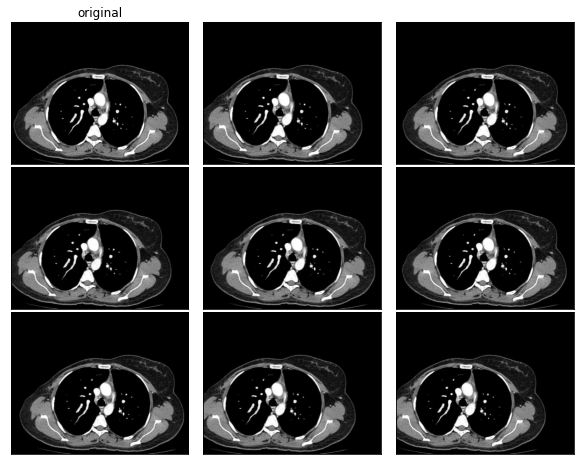

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, fill_mode='constant')
generate_plot_pics(datagen,orig_img)

Height Shift Range

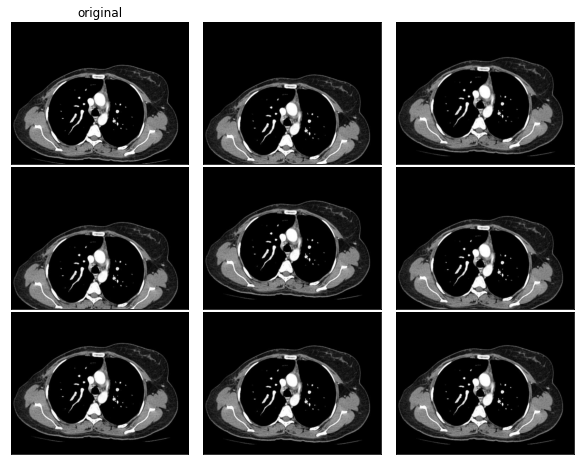

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.1, fill_mode='constant')
generate_plot_pics(datagen,orig_img)

Zoom Range



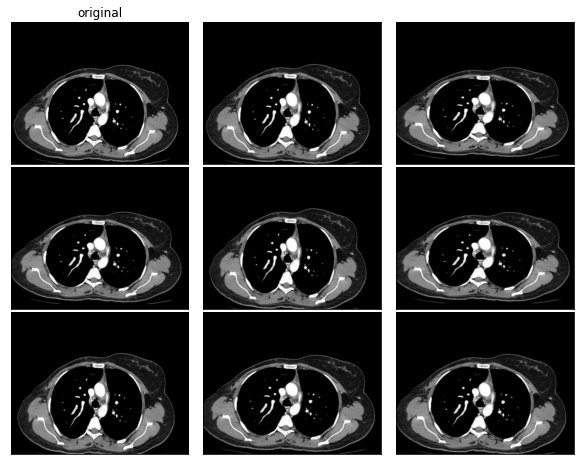

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.1, fill_mode='constant')
generate_plot_pics(datagen,orig_img)

Brightness Range

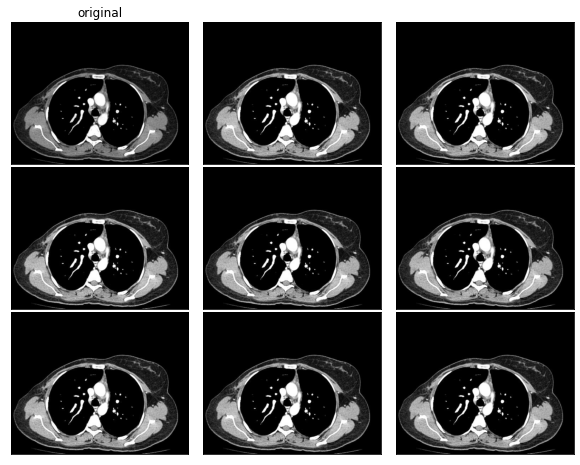

In [ ]:
datagen = ImageDataGenerator(brightness_range=(1.3,1.3), fill_mode='constant')
generate_plot_pics(datagen,orig_img)

Hoizontal Flip

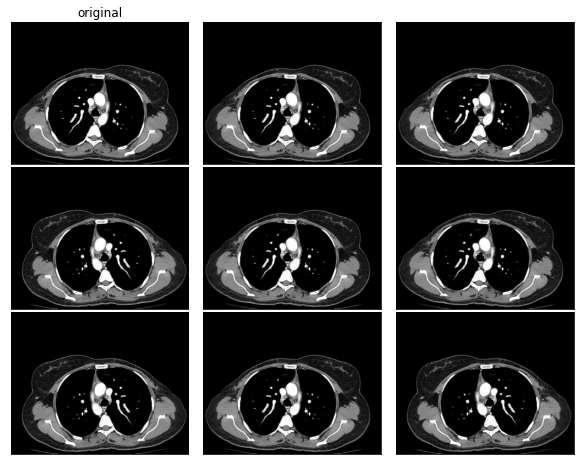

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, fill_mode='constant')
generate_plot_pics(datagen,orig_img)

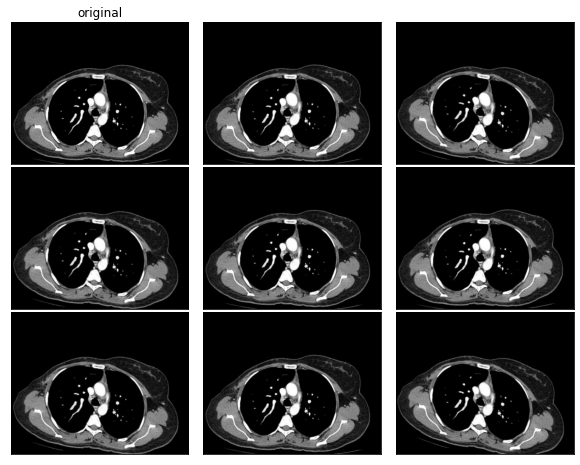

In [ ]:
datagen = ImageDataGenerator(shear_range=10, fill_mode='constant')
generate_plot_pics(datagen,orig_img)